In [7]:
# === IMPORTS ===
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn preprocessing tools: StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

# sklearn imputer: SimpleImputer
from sklearn.impute import SimpleImputer

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)


In [42]:
# Exercise 1: Duplicate Detection and Removal
# Instructions
# Objective: Identify and remove duplicate entries in the Titanic dataset.

# Load the Titanic dataset.
# Identify if there are any duplicate rows based on all columns.
# Remove any duplicate rows found in the dataset.
# Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.
# Hint: Use the duplicated() and drop_duplicates() functions in Pandas.



dataSet="train.csv"

titanic = pd.read_csv(dataSet)

df = titanic.copy()

print(f"Duplicate rows: {titanic.duplicated().sum()}")

df = titanic.drop_duplicates()

print(f"Duplicate rows: {titanic.duplicated().sum()}")



Duplicate rows: 0
Duplicate rows: 0


In [43]:
# Exercise 2: Handling Missing Values
# Instructions
# Identify columns in the Titanic dataset with missing values.
# Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
# Apply each strategy to different columns based on the nature of the data.
# Hint: Review methods like dropna(), fillna(), and SimpleImputer from scikit-learn.

df.info()

missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_pct
})

print(missing_df[missing_df["Missing Count"] > 0])

# drop Cabin (too many missing)
df = df.drop(columns=["Cabin"])

# fill Age with median within each Pclass
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))

# fill Embarked with most common value
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode(dropna=True)[0])

print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
          Missing Count  Missing %
Age                 177  19.865320
Cabin               687  77.104377
Embarked              2   0.224467
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Si

In [44]:
# Exercise 3: Feature Engineering
# Instructions
# Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
# Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
# You will encode new categorical features (like Title) here, but do not scale numerical features yet — that will come after outlier handling.
# Hint: Utilize Pandas for data manipulation and scikit-learn’s preprocessing module for encoding.

df['family_size'] = df['SibSp'] + df['Parch'] + 1

df['family_size'].value_counts().sort_index()

df['title'] = df['Name'].str.extract(r',\s*([^.]+)\.')
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    # map rare/foreign titles
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Mlle': 'Miss',
    'Major': 'Rare',
    'Ms': 'Mrs',
    'Mme': 'Mrs',
    'Don': 'Rare',
    'Lady': 'Rare',
    'Sir': 'Rare',
    'Capt': 'Rare',
    'the Countess': 'Rare',
    'Jonkheer': 'Rare'
}

bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Middle Aged', 'Senior']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df['title'] = df['title'].map(title_mapping)


sex_mapping = {'male': 0, 'female': 1}

df['sex_encoded'] = df['Sex'].map(sex_mapping)

title_dummies  = pd.get_dummies(df['title'], prefix='title').astype(int)
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked').astype(int)

df = pd.concat([df, title_dummies,embarked_dummies ], axis=1)

df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,age_group,sex_encoded,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Young Adult,0,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Middle Aged,1,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Young Adult,1,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Young Adult,1,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Young Adult,0,0,0,1,0,0,0,0,1


STEP 4: Outlier Detection and Handling


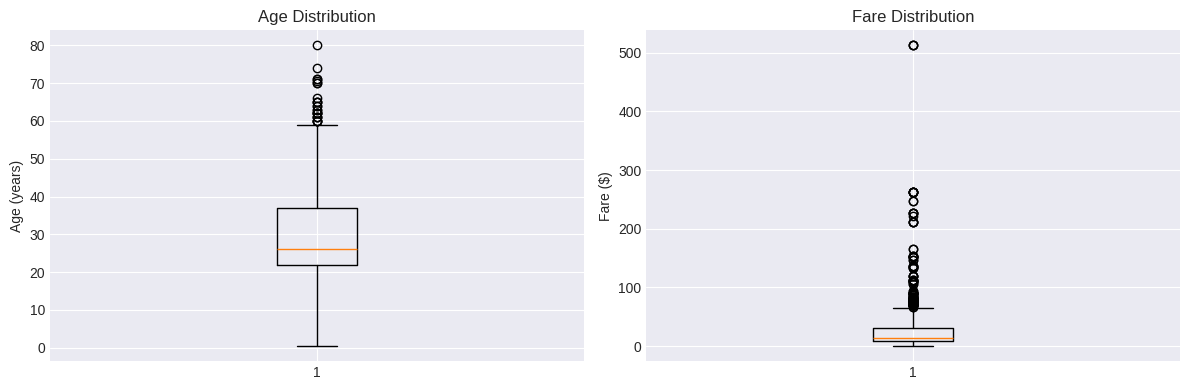


Boxplot interpretation:
  Box = middle 50% of data (Q1 to Q3)
  Line in box = median
  Whiskers = 1.5 × IQR from box
  Dots outside whiskers = OUTLIERS
Q1 (25th percentile): $7.9104
Q3 (75th percentile): $31.0
IQR: $23.0896
Lower bound: $-26.724
Upper bound: $65.6344
Outliers detected: 13.0% of data
Capping fare at 98th percentile: $211.3375
Values to be capped: 17
Before capping
Max fare: $512.3292
After capping
Max fare: $211.3375


In [45]:
# Exercise 4: Outlier Detection and Handling
# Goal: Detect and cap or transform outliers in columns like Fare and Age.

# 1. Visualize distributions using boxplots or histograms to identify potential outliers.
# 2. Use IQR or Z-score methods to detect them.
# 3. Handle outliers with:

# Quantile capping (e.g. 0.98)
# Log transformation
# Row removal
# 4. Compare the dataset before and after treatment.

# 📌 Note: Small differences between 0.98 and 0.99 quantiles are normal when extreme values are rare or far apart. Use df.quantile() to explore and choose thresholds empirically, backed by visualization.

# STEP 4: Outlier Detection
print("STEP 4: Outlier Detection and Handling")
print("=" * 40)

# Visualize distributions with boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(df['Age'].dropna())
axes[0].set_title('Age Distribution')
axes[0].set_ylabel('Age (years)')

axes[1].boxplot(df['Fare'].dropna())
axes[1].set_title('Fare Distribution')
axes[1].set_ylabel('Fare ($)')

plt.tight_layout()
plt.show()

print("\nBoxplot interpretation:")
print("  Box = middle 50% of data (Q1 to Q3)")
print("  Line in box = median")
print("  Whiskers = 1.5 × IQR from box")
print("  Dots outside whiskers = OUTLIERS")
# === CALCULATE IQR FOR FARE ===
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
# Calculate upper/lower bounds
# Count outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): ${Q1}")
print(f"Q3 (75th percentile): ${Q3}")
print(f"IQR: ${IQR}")

print(f"Lower bound: ${lower_bound}")
print(f"Upper bound: ${upper_bound}")

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

print(f"Outliers detected: {len(outliers)/len(df) * 100:.1f}% of data")

# === CAP OUTLIERS AT 98TH PERCENTILE ===
fare_cap = df['Fare'].quantile(0.98)

outliers_count = (df['Fare'] > fare_cap).sum()

print(f"Capping fare at 98th percentile: ${fare_cap}")
print(f"Values to be capped: {outliers_count}")
print("Before capping")
print(f"Max fare: ${df['Fare'].max()}")


df['Fare'] = df['Fare'].clip(upper=fare_cap)
# Show before/after max values
print("After capping")
print(f"Max fare: ${df['Fare'].max()}")

In [46]:
# Exercise 5: Data Standardization and Normalization
# Goal: Scale numerical features to prepare for modeling.

# Use StandardScaler (mean = 0, std = 1) for normally distributed features.
# Use MinMaxScaler (range [0, 1]) for features that are skewed or bounded.
# 📌 Important: Perform this step after outlier treatment to avoid distortion caused by extreme values.


scaler = StandardScaler()

df['age_scaled'] = scaler.fit_transform(df[['Age']])
df['fare_scaled'] = scaler.fit_transform(df[['Fare']])

df[['age_scaled', 'fare_scaled']]

,age_scaled,fare_scaled
0,-0.533834,-0.587437
1,0.674891,1.018110
2,-0.231653,-0.570512
3,0.448255,0.562189
4,0.448255,-0.567378
...,...,...
886,-0.156107,-0.443264
887,-0.760469,-0.017012
888,-0.382743,-0.181244
889,-0.231653,-0.017012


In [47]:

# Exercise 6: Feature Encoding
# Goal: Finalize categorical variable encoding.

# 1. Identify remaining categorical columns (e.g. Sex, Embarked, Title).
# 2. Apply:

# One-Hot Encoding for nominal variables.
# Label Encoding if any ordinal variables remain.
# 3. Merge encoded columns back into the main dataset.

# 📌 Reminder: Encoding comes after handling missing values and outliers, but before scaling (if applicable).



sex_mapping = {'male': 0, 'female': 1}

df['sex_encoded'] = df['Sex'].map(sex_mapping)



age_mapping = {
    'Child': 0,
    'Teen': 1,
    'Young Adult': 2,
    'Middle Aged': 3,
    'Senior': 4
}

df['age_group_encoded'] = df['age_group'].map(age_mapping)

In [48]:
# Exercise 7: Data Transformation for Age Feature
# Goal: Create and encode age groups.

# Use pd.cut() to create bins for life stages (e.g. child, teen, adult, senior).
# Apply one-hot encoding using pd.get_dummies().
# 📌 Example: You might define bins like [0, 12, 18, 60, 100] and label them accordingly.


bins = [0, 12, 18, 60, 100]
labels = ["Child", "Teen", "Adult", "Senior"]
df["age_group"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

age_group_dummies = pd.get_dummies(df["age_group"], prefix="age_group").astype(int)
df = pd.concat([df, age_group_dummies], axis=1)

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family_size', 'title',
       'age_group', 'sex_encoded', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_Rare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'age_scaled', 'fare_scaled', 'age_group_encoded', 'age_group_Child',
       'age_group_Teen', 'age_group_Adult', 'age_group_Senior'],
      dtype='object')